#### 
NAME  : RAHINI DEVI S
    
ROLLNO: 225229129

## SMA LAB ASSIGNMENT-2 

(Use the networkx package to find the different types of centralities for any network)

#### Importing the necessary packages

In [1]:
import networkx as nx
import numpy as np

In [2]:
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [3]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

### Krackhardt kite graph

The Krackhardt kite is the simple graph on 10 nodes and 18 edges.

In [4]:
G = nx.krackhardt_kite_graph()
df = nx.to_pandas_edgelist(G)[['source', 'target']] # cut the weights, for visualization
G = nx.from_pandas_edgelist(df)

In [5]:
nx.krackhardt_kite_graph

<function networkx.generators.small.krackhardt_kite_graph(create_using=None)>

C:\Users\visit\AppData\Local\Temp\ipykernel_13792\1794451103.py:3: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


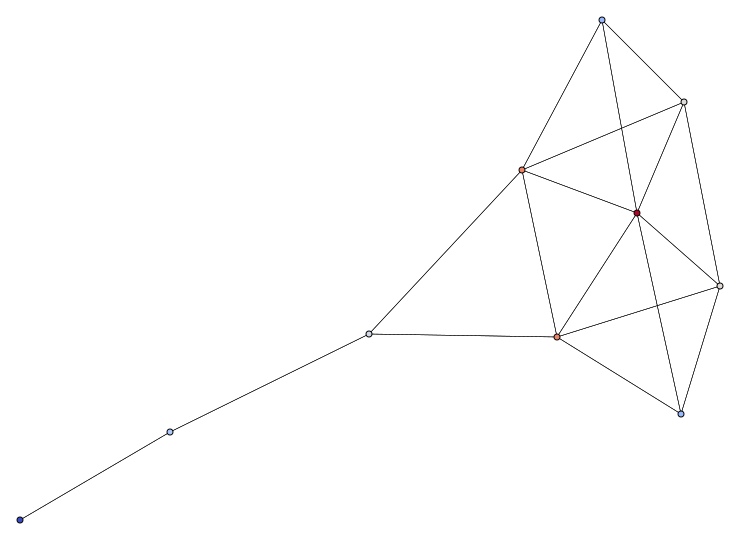

In [6]:
# this is a network / graph

draw_graph(G, node_size=3)

C:\Users\visit\AppData\Local\Temp\ipykernel_13792\1794451103.py:3: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr')


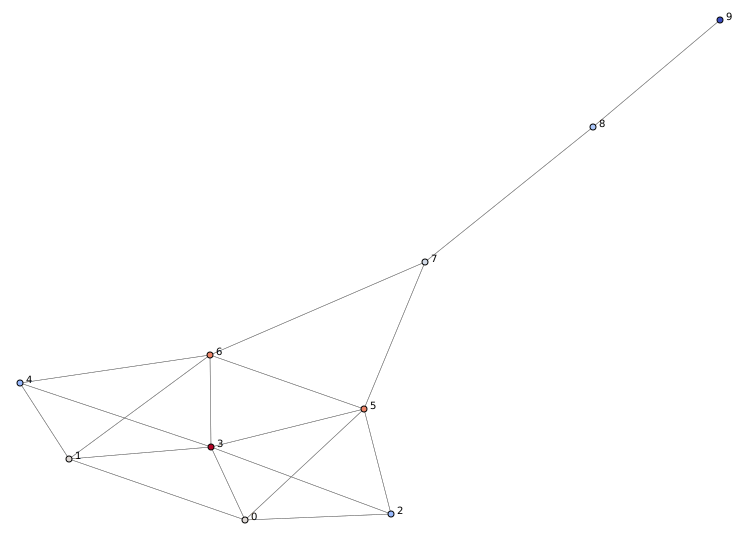

In [7]:
# with labels

draw_graph(G, node_size=3, show_names=True)

In [8]:
# these are ten of the nodes

sorted(G.nodes)[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

##### 1.Degree Centrality

Degree Centrality: Importance based on the number of degrees (edges)

In [9]:
import pandas as pd

In [10]:
deg_cent = nx.degree_centrality(G)

In [11]:
deg_cent_df = pd.DataFrame().from_dict(deg_cent, orient='index')
deg_cent_df.columns = ['degree_centrality']
deg_cent_df.sort_values('degree_centrality', ascending=False, inplace=True)

In [12]:
deg_cent_df.head(10)

,degree_centrality
3,0.666667
5,0.555556
6,0.555556
0,0.444444
1,0.444444
2,0.333333
4,0.333333
7,0.333333
8,0.222222
9,0.111111


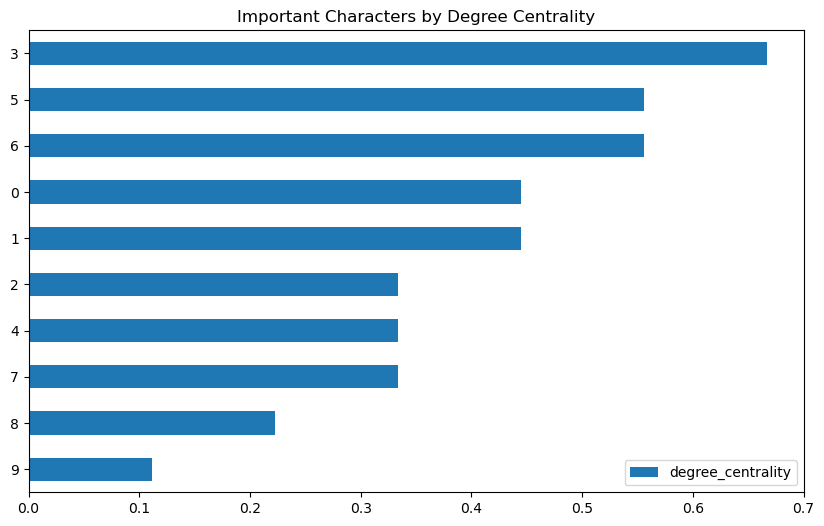

In [13]:
title = 'Important Characters by Degree Centrality'

deg_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

##### 2.Betweenness Centrality

Betweenness Centrality: Importance based on whether a node sits between other nodes; Information flows through them. Can also be gatekeepers. They have power.

In [14]:
betw_cent = nx.betweenness_centrality(G)

In [15]:
betw_cent_df = pd.DataFrame().from_dict(betw_cent, orient='index')
betw_cent_df.columns = ['betweenness_centrality']
betw_cent_df.sort_values('betweenness_centrality', ascending=False, inplace=True)

In [16]:
betw_cent_df.head(10)

,betweenness_centrality
7,0.388889
5,0.231481
6,0.231481
8,0.222222
3,0.101852
0,0.023148
1,0.023148
2,0.000000
4,0.000000
9,0.000000


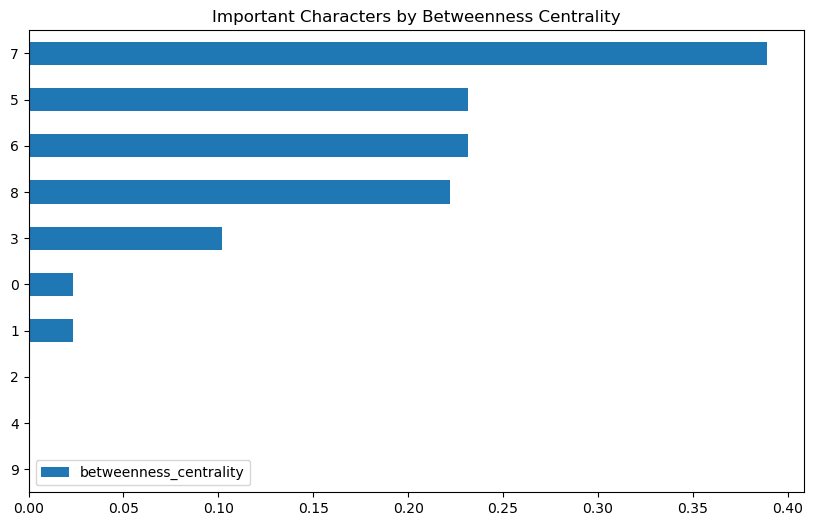

In [17]:
title = 'Important Characters by Betweenness Centrality'

betw_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

##### 3.Closeness Centrality

Closeness Centrality: Importance based on a nodes closeness to other nodes. Has to do with number of steps away.

In [18]:
close_cent = nx.closeness_centrality(G)

In [19]:
close_cent_df = pd.DataFrame().from_dict(close_cent, orient='index')
close_cent_df.columns = ['closeness_centrality']
close_cent_df.sort_values('closeness_centrality', ascending=False, inplace=True)

In [20]:
close_cent_df.head(10)

,closeness_centrality
5,0.642857
6,0.642857
3,0.600000
7,0.600000
0,0.529412
1,0.529412
2,0.500000
4,0.500000
8,0.428571
9,0.310345


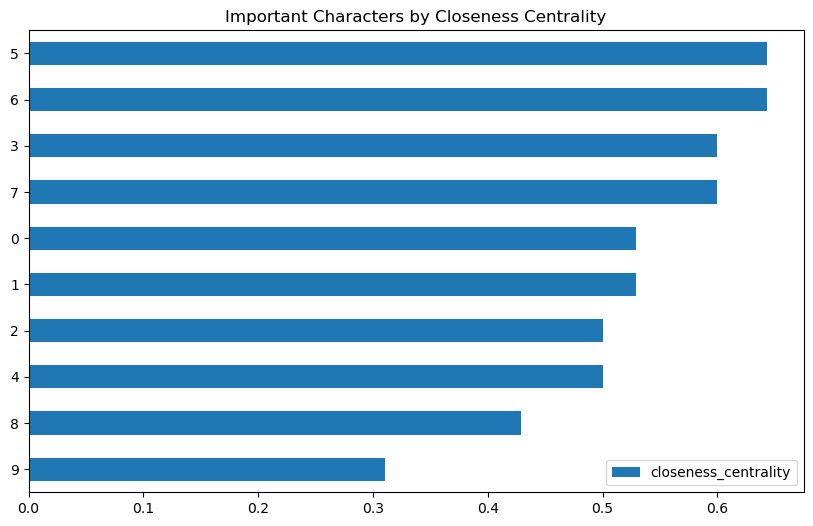

In [21]:
title = 'Important Characters by Closeness Centrality'

close_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

##### 4.PageRank

PageRank : Importance based on number of inbound and outbound edges. Inbound is more important than outbound.

In [22]:
page_rank = nx.pagerank(G)

In [23]:
pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)

In [24]:
pr_df.head(10)

,page_rank
3,0.147148
5,0.128907
6,0.128907
0,0.101920
1,0.101920
7,0.095248
8,0.085696
2,0.079418
4,0.079418
9,0.051420


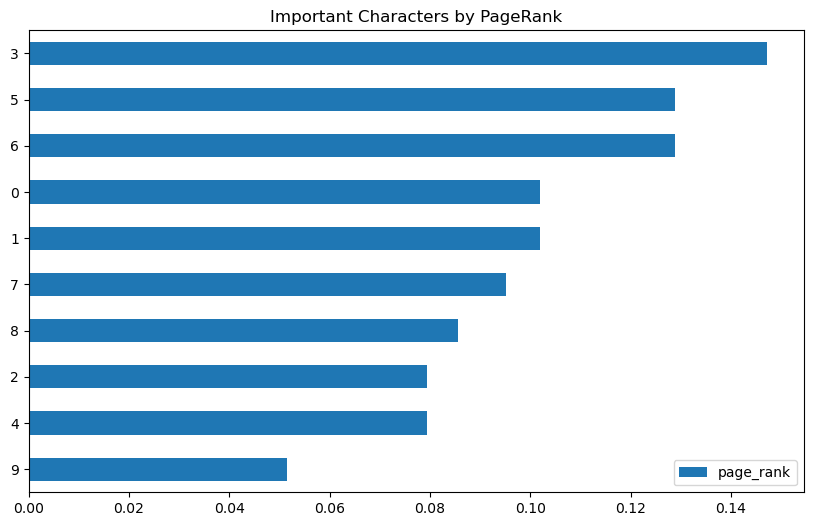

In [25]:
title = 'Important Characters by PageRank'

pr_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

## Tutte Graph

It is a graph with 46 vertices and 69 edges.
It is important because it is an exception to Tait’s conjecture which states that every 3-regular polyhedron has a Hamiltonian cycle.

In [26]:
G = nx.tutte_graph()

In [27]:
df = nx.to_pandas_edgelist(G)[['source', 'target']] # cut the weights, for visualization
G = nx.from_pandas_edgelist(df)

##### 1. Degre Centality

In [28]:
deg_cent = nx.degree_centrality(G)

In [29]:
deg_cent_df = pd.DataFrame().from_dict(deg_cent, orient='index')
deg_cent_df.columns = ['degree_centrality']
deg_cent_df.sort_values('degree_centrality', ascending=False, inplace=True)

In [30]:
deg_cent_df.head(10)

,degree_centrality
0,0.066667
21,0.066667
15,0.066667
34,0.066667
16,0.066667
22,0.066667
17,0.066667
44,0.066667
43,0.066667
45,0.066667


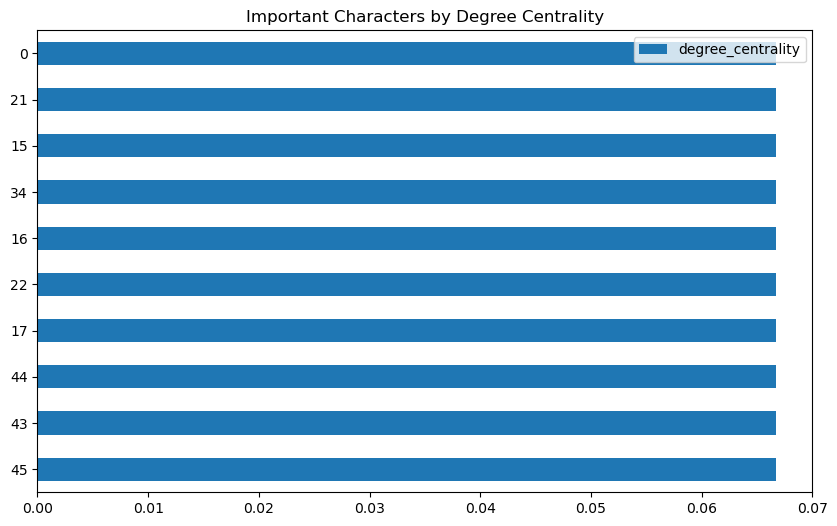

In [31]:
title = 'Important Characters by Degree Centrality'

deg_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

##### 2. Between Centrality

In [32]:
betw_cent = nx.betweenness_centrality(G)

In [33]:
betw_cent_df = pd.DataFrame().from_dict(betw_cent, orient='index')
betw_cent_df.columns = ['betweenness_centrality']
betw_cent_df.sort_values('betweenness_centrality', ascending=False, inplace=True)

In [34]:
betw_cent_df.head(10)

,betweenness_centrality
0,0.232540
15,0.158514
7,0.158514
23,0.158514
13,0.157588
21,0.157588
6,0.157588
3,0.148040
2,0.148040
1,0.148040


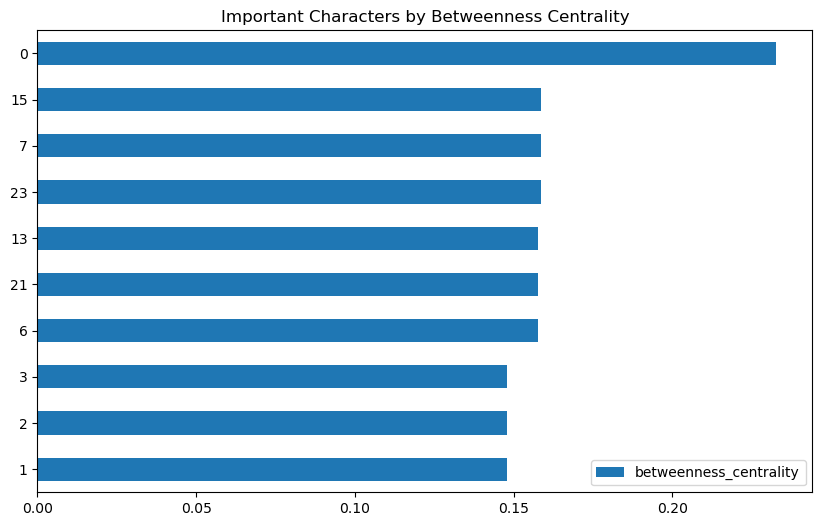

In [35]:
title = 'Important Characters by Betweenness Centrality'

betw_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

##### 3. Closeness Cnetrality

In [36]:
close_cent = nx.closeness_centrality(G)

In [37]:
close_cent_df = pd.DataFrame().from_dict(close_cent, orient='index')
close_cent_df.columns = ['closeness_centrality']
close_cent_df.sort_values('closeness_centrality', ascending=False, inplace=True)

In [38]:
close_cent_df.head(10)

,closeness_centrality
0,0.277778
6,0.263158
21,0.263158
13,0.263158
15,0.258621
23,0.258621
7,0.258621
14,0.257143
2,0.257143
22,0.257143


In [39]:
df = nx.to_pandas_edgelist(G)[['source', 'target']] # cut the weights, for visualization
G = nx.from_pandas_edgelist(df)

##### 4. PageRank

In [40]:
page_rank = nx.pagerank(G)

In [41]:
pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)

In [42]:
pr_df.head(10)

,page_rank
0,0.021739
15,0.021739
8,0.021739
14,0.021739
23,0.021739
38,0.021739
13,0.021739
34,0.021739
37,0.021739
36,0.021739


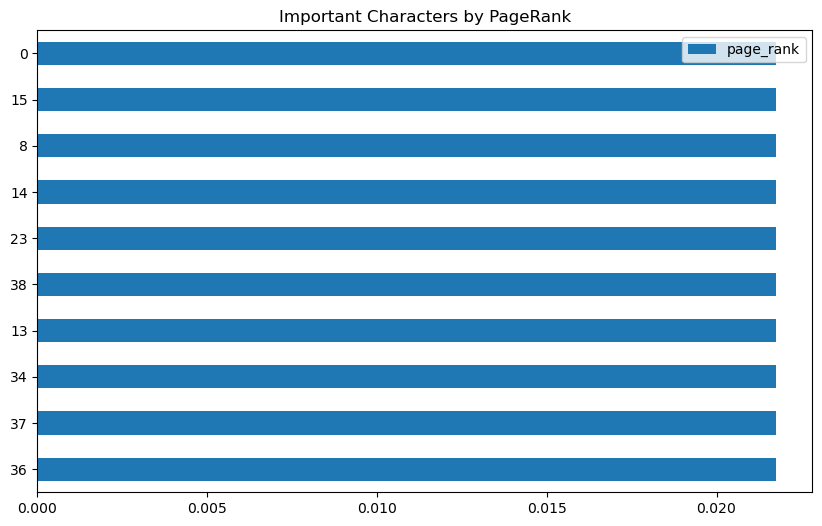

In [43]:
title = 'Important Characters by PageRank'

pr_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()